In [2]:
run baseline_proj.py

[INFO]Reading the word2vec vectors in  en  from  ./data_baseline/good_vecs_en.csv ---
[INFO]Reading the word2vec vectors in  jp  from  ./data_baseline/good_vecs_jp.csv ---
[DEBUG] inv(JTJ)*JTJ=I?: 
[DEBUG] [[  1.00000000e+00   1.91963307e-12   2.35026415e-12 ...,   5.48230575e-14
   -2.53620143e-12  -7.09088496e-13]
 [ -3.74589285e-12   1.00000000e+00   3.80477022e-13 ...,   9.39741479e-13
   -3.94819303e-14  -5.11707022e-12]
 [  4.28733291e-12   2.59181811e-12   1.00000000e+00 ...,  -3.91510958e-13
   -1.27291775e-12  -4.87672564e-13]
 ..., 
 [  2.31703545e-12   8.51610359e-13   6.83905426e-14 ...,   1.00000000e+00
    2.60250195e-13   4.87370210e-13]
 [  1.68333263e-12  -4.30644827e-13  -3.41771696e-12 ...,   5.35846248e-13
    1.00000000e+00  -3.86998816e-13]
 [ -1.53319589e-12   5.53895644e-13   1.69822493e-12 ...,  -4.54747351e-13
   -1.36424205e-12   1.00000000e+00]]
Reading english Data: 1000
Reading english Data: 1000
Merging the English and Japanes news dataframe...
Drop the n

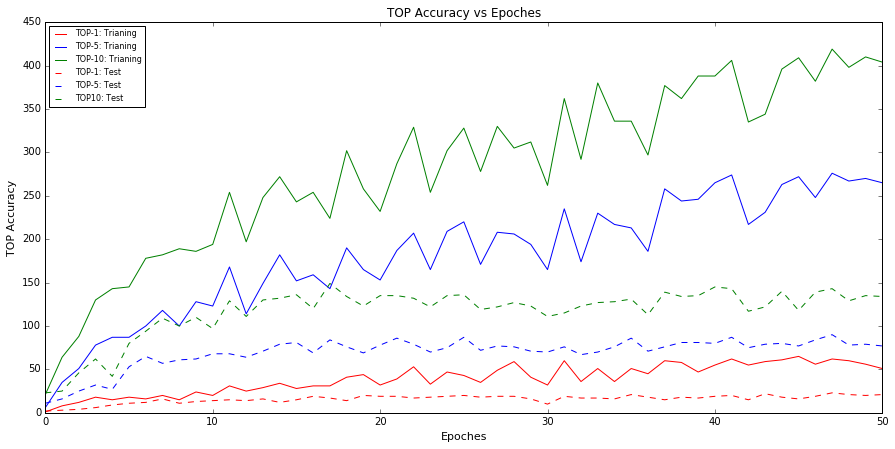

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(sls.tops[1],'r-', label = "TOP-1: Trianing")
plt.plot(sls.tops[5],'b-', label = "TOP-5: Trianing" )
plt.plot(sls.tops[10],'g-', label = "TOP-10: Trianing")
plt.plot(sls.tops_test[1],'r--', label = "TOP-1: Test")
plt.plot(sls.tops_test[5],'b--', label = "TOP-5: Test")
plt.plot(sls.tops_test[10],'g--', label = "TOP10: Test")
plt.ylabel('TOP Accuracy', fontsize=11)
plt.xlabel('Epoches', fontsize=11)
plt.title('TOP Accuracy vs Epoches')
plt.legend(loc = 2, fontsize=8)
plt.savefig('top1-5-10_e40_l0.eps', format='eps', dpi=1000)
plt.show()

In [22]:
	if True:
		print "Evaluate the model using fast estimation..."
		projection1_train, projection2_train = sls.seq2vec(train_1)
		projection1_test, projection2_test = sls.seq2vec(test_1)

		sim_results_train, rank_results_train = lstm.find_ranking(projection1_train, projection2_train)
		sim_results_test, rank_results_test = lstm.find_ranking(projection1_test, projection2_test)

		print pd.Series(rank_results_train).describe()
		print pd.Series(rank_results_test).describe()


Evaluate the model using fast estimation...
count    999.000000
mean      30.174174
std       39.208408
min        1.000000
25%        5.000000
50%       16.500000
75%       40.000000
max      356.000000
dtype: float64
count    1000.000000
mean      114.087000
std       110.291721
min         1.000000
25%        24.000000
50%        65.000000
75%       188.500000
max       532.000000
dtype: float64


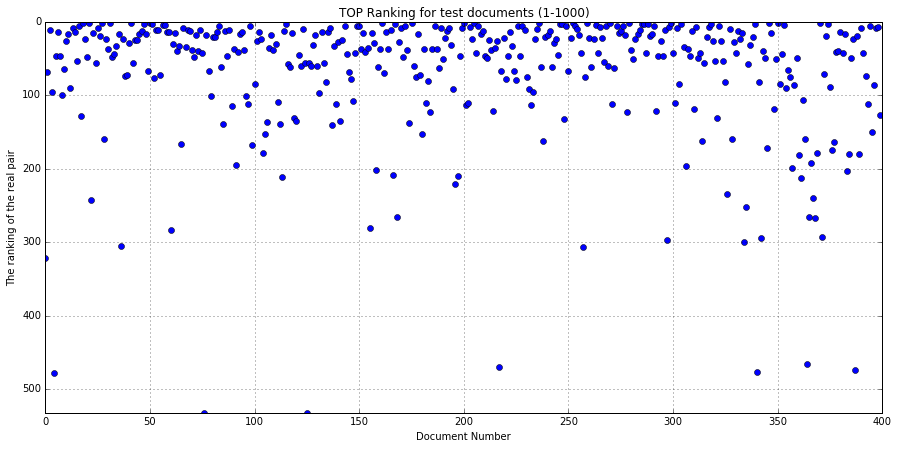

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
# matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_test[600:1000],'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([1000,0])
plt.ylim([532,0.5])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

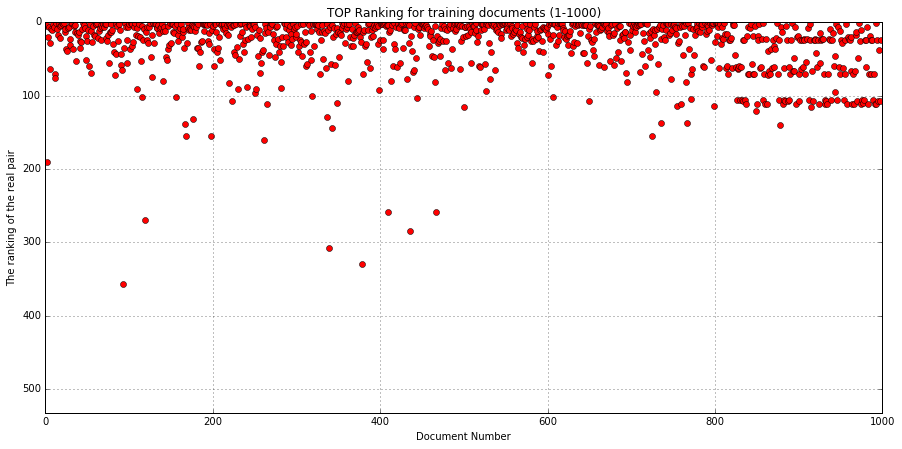

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_train,'ro')
plt.title('TOP Ranking for training documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([532,0])
plt.grid(True)
plt.savefig('top-training.eps', format='eps', dpi=1000)
plt.show()

In [14]:
type(rank_results_test)

list

In [18]:
sim_results_test, rank_results_test = lstm.find_ranking(projection1_test[600:1000], projection2_test[600:1000])
print pd.Series(rank_results_test).describe()

count    400.000000
mean      41.847500
std       50.092939
min        1.000000
25%        9.500000
50%       24.500000
75%       55.125000
max      318.000000
dtype: float64


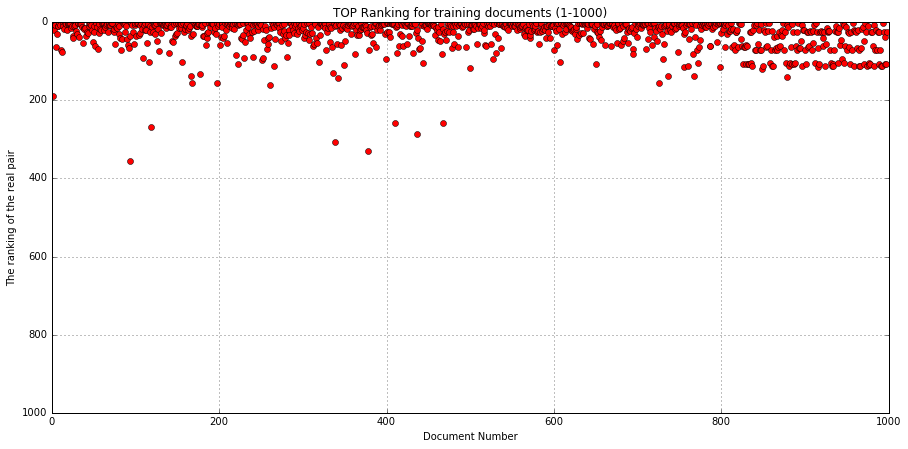

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_train,'ro')
plt.title('TOP Ranking for training documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([1000,0])
plt.grid(True)
plt.savefig('top-training.eps', format='eps', dpi=1000)
plt.show()

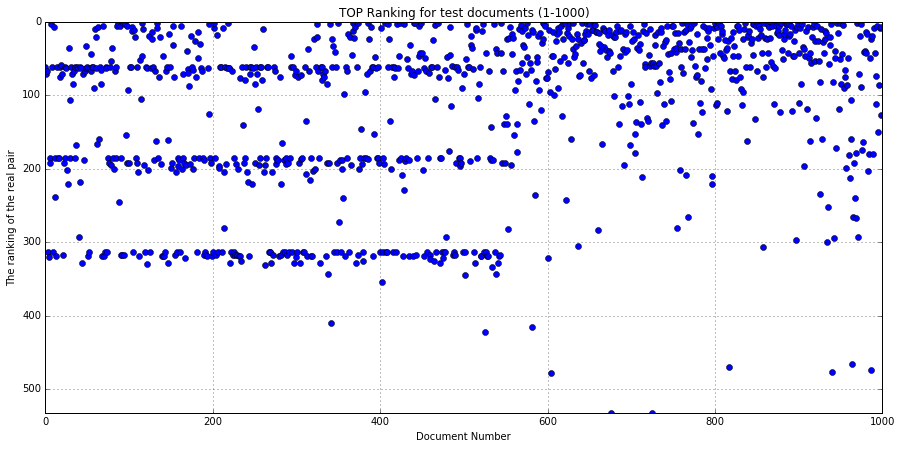

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
# matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_test,'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
# plt.ylim([1000,0])
plt.ylim([532,0.5])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

In [33]:
test_1[0]

["european central bank leave interest rate unchanged thursday shift focus asset-buying plan which it hop revive flagging euro economy see spectre deflation be highlight comment ecb president mario draghi his post-meeting news conference policy bargain be great bargain here do you do we know our measure be go be more effective sometimes be effective mere other policy will be place actor have it role perform euroscepticism it very understandable people be eurosceptic thing be not go well opposite direction part world thing be not go well you have pervasive unemployment you have very low weak economic activity country recession that seem never end you ca n't expect people be enthusiastic other part europe you have people feel they re pay everybody else tltros tltros be precise devise ensure bank lend what they borrow ecb they do n't lend they will have repay everything greek ab must be programme there ecb buy greek ab programme purchase importance of balance sheet size i understand your 

In [ ]:
f